In [ ]:
# to be imported
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Flatten, Dropout, Lambda, Bidirectional
from keras.layers.embeddings import Embedding
import tensorflow as tf

from __future__ import print_function
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer

from keras.models import load_model
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, LSTM, GRU
from keras.callbacks import EarlyStopping
from keras import initializers
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ASPECT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install svg.path

Class 0: 891
Class 1: 807
Class 2: 669


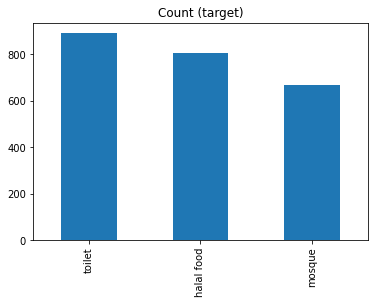

In [ ]:
import numpy as np
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/TA & SKRIPSI/TA/DATASETJADI.csv')
target_count_aspect = df_train.aspek.value_counts()

print('Class 0:', target_count_aspect["toilet"])
print('Class 1:', target_count_aspect["halal food"])
print('Class 2:', target_count_aspect["mosque"])

target_count_aspect.plot(kind='bar', title='Count (target)');

In [ ]:
df_train_aspect = df_train.loc[df_train['aspek'].isin(["toilet", "halal food", "mosque"])]

In [ ]:
count_class_0_aspect, count_class_1_aspect, count_class_2_aspect = df_train_aspect.aspek.value_counts()

df_class_0_aspect = df_train_aspect[df_train_aspect['aspek'] == "toilet"]
df_class_1_aspect = df_train_aspect[df_train_aspect['aspek'] == "halal food"]
df_class_2_aspect = df_train_aspect[df_train_aspect['aspek'] == "mosque"]

Random over-sampling:
mosque        891
halal food    891
toilet        891
Name: aspek, dtype: int64


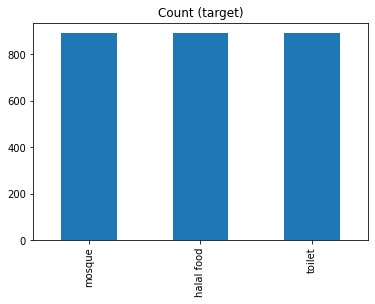

In [ ]:
df_class_1_over_aspect = df_class_1_aspect.sample(count_class_0_aspect, replace=True)
df_class_2_over_aspect = df_class_2_aspect.sample(count_class_0_aspect, replace=True)
df_test_over_aspect = pd.concat([df_class_0_aspect, df_class_1_over_aspect, df_class_2_over_aspect], axis=0)

print('Random over-sampling:')
print(df_test_over_aspect.aspek.value_counts())

df_test_over_aspect.aspek.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
df_test_over_aspect.head()

,review,sentimen,aspek
408,worth visit mosque asian arabic styles avoid b...,negative,toilet
411,come lunch crappy tourist trap guide lots cool...,positive,toilet
674,hour late night lounge provided fantastic envi...,positive,toilet
675,recommend lounge clean food cheap nasty toilet...,negative,toilet
676,stay included travel company change flight hou...,negative,toilet


In [ ]:
cols = ['aspek','review']
d_aspect = df_test_over_aspect[cols]

d_aspect=d_aspect[d_aspect['review'].notnull()]

d_aspect=d_aspect[d_aspect['aspek'].notnull()]
d_aspect.reset_index(drop=True,inplace=True)
x_aspect = d_aspect.iloc[:, 1].values
y_aspect = d_aspect.iloc[:, 0].values

print(np.unique(y_aspect, return_counts=True))

(array(['halal food', 'mosque', 'toilet'], dtype=object), array([891, 891, 891]))


In [ ]:
print(d_aspect)

       aspek                                             review
0     toilet  worth visit mosque asian arabic styles avoid b...
1     toilet  come lunch crappy tourist trap guide lots cool...
2     toilet  hour late night lounge provided fantastic envi...
3     toilet  recommend lounge clean food cheap nasty toilet...
4     toilet  stay included travel company change flight hou...
...      ...                                                ...
2668  mosque  cheek jowl temples markets peaceful serene mos...
2669  mosque  shopping food galore halal food choices level ...
2670  mosque                            glad proper prayer room
2671  mosque  lots food artistic items nice evening visiting...
2672  mosque  railway station administration building road h...

[2673 rows x 2 columns]


In [ ]:
len(d_aspect)

2673

In [ ]:
len(y_aspect)

2673

In [ ]:
tk_aspect = Tokenizer()

In [ ]:
text_aspect = d_aspect['review'].values
maxlen_aspect = max([len(i.split()) for i in text_aspect])

tk_aspect.fit_on_texts(text_aspect)
x_aspect = tk_aspect.texts_to_sequences(x_aspect)
x_aspect = sequence.pad_sequences(x_aspect, maxlen_aspect)
vocab_aspect = max([len(tk_aspect.word_index)]) + 1
print(x_aspect)

[[   0    0    0 ...  409  157  735]
 [   0    0    0 ...    6  403  127]
 [   0    0    0 ...  118    8  156]
 ...
 [   0    0    0 ... 1059  243 2825]
 [   0    0    0 ...   24    9 1850]
 [   0    0    0 ...  565 4671    6]]


In [ ]:
print("vocab aspect : " + str(vocab_aspect))
print("maxlen aspect: " + str(maxlen_aspect))

vocab aspect : 7066
maxlen aspect: 580


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_Y_aspect = LabelEncoder()
y_aspect = labelencoder_Y_aspect.fit_transform(y_aspect)
print(np.unique(y_aspect, return_counts=True))

(array([0, 1, 2]), array([891, 891, 891]))


In [ ]:
from tensorflow.keras import utils as np_utils
y_aspect = np_utils.to_categorical(y_aspect, num_classes= 3)

print(y_aspect)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train_aspect, x_test_aspect, y_train_aspect, y_test_aspect, indices_train_aspect, indices_test_aspect = train_test_split(x_aspect, y_aspect, d_aspect.index, test_size=0.33, random_state=42)

print(x_train_aspect.shape)
print(y_train_aspect.shape)
print(x_test_aspect.shape)
print(y_test_aspect.shape)
print(y_aspect)

(1790, 580)
(1790, 3)
(883, 580)
(883, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
x_train_aspect = sequence.pad_sequences(x_train_aspect, maxlen=maxlen_aspect)
x_test_aspect = sequence.pad_sequences(x_test_aspect, maxlen=maxlen_aspect)
print('x_train aspect shape:', x_train_aspect.shape)
print('x_test aspect shape:', x_test_aspect.shape)

x_train aspect shape: (1790, 580)
x_test aspect shape: (883, 580)


In [ ]:
embedding_dims = 64
filters = 200
kernel_size = 9
hidden_dims = 128
dropout = 0.25
lstm_unit = 64
gru_unit = 64

In [ ]:
from keras.utils.vis_utils import plot_model

model_aspect = Sequential()
model_aspect.add(Embedding(vocab_aspect,
                      embedding_dims,
                      input_length=maxlen_aspect))
model_aspect.add(Dropout(dropout))

model_aspect.add(Conv1D(filters,
                      kernel_size,
                      padding='valid',
                      activation='relu',
                      strides=1))

model_aspect.add(MaxPooling1D())
model_aspect.add(Dense(hidden_dims))
model_aspect.add(Dropout(dropout))
model_aspect.add(Activation('relu'))

model_aspect.add(Bidirectional(LSTM(lstm_unit)))

model_aspect.add(Dense(3))
model_aspect.add(Activation('softmax'))

model_aspect.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_aspect = model_aspect.fit(x_train_aspect, y_train_aspect,
          batch_size=64,
          epochs=12,
          validation_split = 0.33,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)])

Epoch 1/12
19/19 [==============================] - 50s 2s/step - loss: 1.0929 - accuracy: 0.4279 - val_loss: 1.0611 - val_accuracy: 0.8054
Epoch 2/12
19/19 [==============================] - 23s 1s/step - loss: 0.6898 - accuracy: 0.8932 - val_loss: 0.2788 - val_accuracy: 0.9255
Epoch 3/12
19/19 [==============================] - 23s 1s/step - loss: 0.1248 - accuracy: 0.9625 - val_loss: 0.1620 - val_accuracy: 0.9526
Epoch 4/12
19/19 [==============================] - 22s 1s/step - loss: 0.0557 - accuracy: 0.9808 - val_loss: 0.1646 - val_accuracy: 0.9543
Epoch 5/12
19/19 [==============================] - 23s 1s/step - loss: 0.0288 - accuracy: 0.9942 - val_loss: 0.2082 - val_accuracy: 0.9526
Epoch 6/12
19/19 [==============================] - 22s 1s/step - loss: 0.0218 - accuracy: 0.9950 - val_loss: 0.1942 - val_accuracy: 0.9543
Epoch 7/12
19/19 [==============================] - 22s 1s/step - loss: 0.0198 - accuracy: 0.9933 - val_loss: 0.2018 - val_accuracy: 0.9526
Epoch 9/12
19/19 [==

In [ ]:
from tensorflow.keras.models import Sequential, save_model, load_model

In [ ]:
# Save the model
filepath = './saved_model'
save_model(model_aspect, filepath)

# Load the model
model_aspect = load_model(filepath, compile = True)

INFO:tensorflow:Assets written to: ./saved_model/assets


INFO:tensorflow:Assets written to: ./saved_model/assets


# Predict Aspect
tidak bisa di run karena butuh pos tagging, jadi langsung evaluate aja

In [ ]:
#from nltk.stem import SnowballStemmer
#snowball = SnowballStemmer(language='english')

#def stem(list):
#    tmp = []
#    for val in list:
#        katadasar = snowball.stem(val)
#        tmp.append(katadasar)
#    return tmp

In [ ]:
#from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#factory = StemmerFactory()
#stemmer = factory.create_stemmer()

#def stem(list):
#    tmp = []
#    for val in list:
#        katadasar = stemmer.stem(val)
#        tmp.append(katadasar)
#    return tmp

In [ ]:
#def ABSA_aspect(list):
#    rsl = []
#    spl_aspect = [val.split() for val in stem(list)]
#    hasil_aspect = [ct.tag_sents([val]) for val in spl_aspect]
#    hasil_aspect = [item for sublist in hasil_aspect for item in sublist]
#    for val in hasil_aspect:
#        tmp = ""
#        for vall in val:
#            if(vall[1] == "NNP" or vall[1] == "NN" or vall[1] == "VB"):
#                tmp = tmp + vall[0] + " "
#        tmp = tmp.split()
#        tmp = ' '.join(tmp)
#        k = tk_aspect.texts_to_sequences([tmp])
#        k = sequence.pad_sequences(k, maxlen=maxlen_aspect)
#        hsl = labelencoder_Y_aspect.inverse_transform([model_aspect.predict_classes(k)])
#        rsl.append(hsl)
#    return rsl

In [ ]:
#kal_aspect = ["after in 6 floor and the prayer room in 5th floor"]

#print(ABSA_aspect(kal_aspect))

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

In [ ]:
aspect = ['mosque','toilet','halal food']
sentence = ['toilet clean']
sequence2 = tk_aspect.texts_to_sequences(sentence)
test = pad_sequences(sequence2, maxlen=maxlen_aspect)
aspect[np.around(model_aspect.predict(test), decimals=0).argmax(axis=1)[0]]

'toilet'

In [ ]:
def ABSA_aspect(list):
    rsl = []
    aspect = ['mosque','toilet','halal food']
    hasil_aspect = list;
    for val in hasil_aspect:
      sequence2 = tk_aspect.texts_to_sequences([val])
      test = sequence.pad_sequences(sequence2, maxlen=maxlen_aspect)
      #hsl = labelencoder_Y_aspect.inverse_transform([model_aspect.predict(test)])
      hsl = aspect[np.around(model_aspect.predict(test), decimals=0).argmax(axis=1)[0]]
      rsl.append(hsl)
    return rsl

In [ ]:
kal_aspect = ["want food plane come next flight information given arrival everything toilet shower area confusing staff disinterested almost rude last visit",
              "building another remnant british colonial period located opposite railway station easy enough find also nice view national mosque didnt going inside office building days"]

print(ABSA_aspect(kal_aspect))

['halal food', 'toilet']


# Evaluate Aspect

In [ ]:
predict_x=model_aspect.predict(x_test_aspect)
new_review_category_aspect=np.argmax(predict_x,axis=1)

In [ ]:
#new_review_category_aspect = model_aspect.predict_classes(x_test_aspect)

In [ ]:
decode_aspect = np.argmax(y_test_aspect, axis=1)

In [ ]:
decode_aspect

array([2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 0,
       0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2,
       1, 2, 1, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2,
       1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2,
       2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0,

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
lab_aspect = ["toilet", "halal food", "mosque"]

In [ ]:
def conf_matrix(Y_act, Y_pred, lab):
    confusion_mtx = confusion_matrix(Y_act, Y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_mtx, annot=True, fmt="d", xticklabels=lab, yticklabels=lab)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

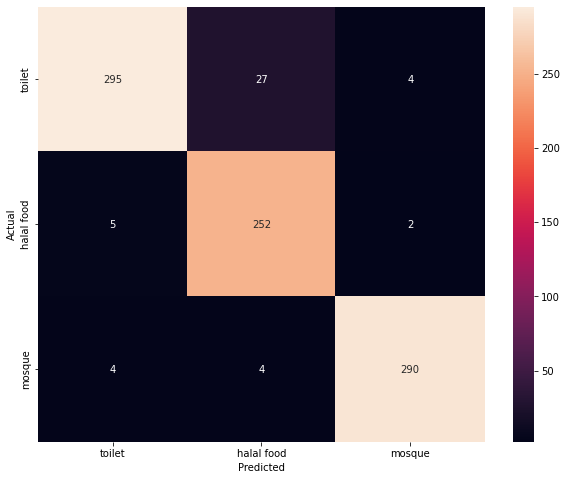

In [ ]:
conf_matrix(new_review_category_aspect, decode_aspect, lab_aspect)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(new_review_category_aspect, decode_aspect)

0.9479048697621744

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(new_review_category_aspect, decode_aspect))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       326
           1       0.89      0.97      0.93       259
           2       0.98      0.97      0.98       298

    accuracy                           0.95       883
   macro avg       0.95      0.95      0.95       883
weighted avg       0.95      0.95      0.95       883



In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(new_review_category_aspect, decode_aspect))
print('F1 score:', f1_score(new_review_category_aspect, decode_aspect, average='macro'))
print('Recall:', recall_score(new_review_category_aspect, decode_aspect, average='macro'))
print('Precision:', precision_score(new_review_category_aspect, decode_aspect, average='macro'))

Accuracy: 0.9479048697621744
F1 score: 0.9476094039439672
Recall: 0.9503451036164011
Precision: 0.9468612768431441


In [ ]:
accr_aspect = model_aspect.evaluate(x_test_aspect,y_test_aspect)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_aspect[0],accr_aspect[1]))

28/28 [==============================] - 8s 244ms/step - loss: 0.1958 - accuracy: 0.9479
Test set
  Loss: 0.196
  Accuracy: 0.948


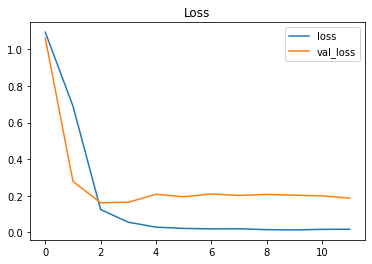

In [ ]:
plt.title('Loss')
plt.plot(history_aspect.history['loss'], label='loss')
plt.plot(history_aspect.history['val_loss'], label='val_loss')
plt.legend()
plt.show();

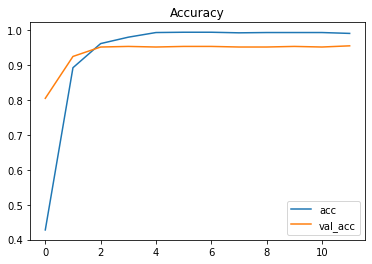

In [ ]:
plt.title('Accuracy')
plt.plot(history_aspect.history['accuracy'], label='acc')
plt.plot(history_aspect.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show();

# Sentiment

Class 0: 1904
Class 1: 463


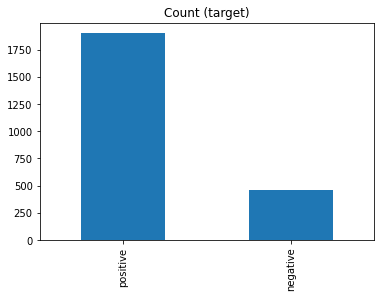

In [ ]:
target_count_sent = df_train.sentimen.value_counts()
print('Class 0:', target_count_sent["positive"])
print('Class 1:', target_count_sent["negative"])

target_count_sent.plot(kind='bar', title='Count (target)');

In [ ]:
#  net             pos            neg
count_class_0_sent, count_class_1_sent = df_train.sentimen.value_counts()

# Divide by class
df_class_0_sent = df_train[df_train['sentimen'] == "positive"]
df_class_1_sent = df_train[df_train['sentimen'] == "negative"]

Random over-sampling:
negative    1904
positive    1904
Name: sentimen, dtype: int64


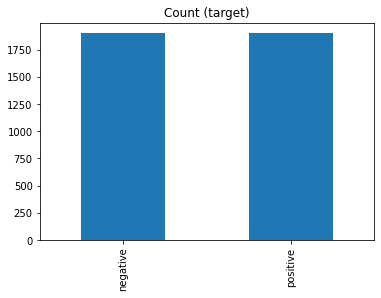

In [ ]:
df_class_1_over_sent = df_class_1_sent.sample(count_class_0_sent, replace=True)
df_test_over_sent = pd.concat([df_class_0_sent, df_class_1_over_sent], axis=0)

print('Random over-sampling:')
print(df_test_over_sent.sentimen.value_counts())

df_test_over_sent.sentimen.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
cols_sent = ['sentimen','review']
d_sent = df_test_over_sent[cols_sent]
d_sent = d_sent[d_sent['review'].notnull()]

d_sent = d_sent[d_sent['sentimen'].notnull()]

In [ ]:
len(d_sent)

3808

In [ ]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)
#set_random_seed(2)

In [ ]:
d_sent.reset_index(drop=True,inplace=True)
x_sent = d_sent.iloc[:, 1].values
y_sent = d_sent.iloc[:, 0].values

In [ ]:
#x_sent = d_sent
#x_sent = d_sent['sentimen']

In [ ]:
tk_sent = Tokenizer()

In [ ]:
text_sent = d_sent['review'].values
maxlen_sent = max([len(i.split()) for i in text_sent])
tk_sent.fit_on_texts(text_sent) # each word in text is given a unique integer number
x_sent = tk_sent.texts_to_sequences(x_sent) # represent a completely new set of word sequence
x_sent = sequence.pad_sequences(x_sent, maxlen_sent) # to ensure that all sequences in a list have the same length
vocab_sent = max([len(tk_sent.word_index)]) + 1
print(x_sent)

[[   0    0    0 ...    9   15    4]
 [   0    0    0 ...   15   46   61]
 [   0    0    0 ...    1   81  510]
 ...
 [   0    0    0 ...   34 2115    7]
 [   0    0    0 ...  424  970  937]
 [   0    0    0 ...  145    5    2]]


In [ ]:
print("vocab sentiment : " + str(vocab_sent))
print("maxlen sentiment : " + str(maxlen_sent))

vocab sentiment : 8051
maxlen sentiment : 580


In [ ]:
from sklearn.preprocessing import LabelEncoder
# encoding the levels of categorical features into numeric values
labelencoder_Y_sent = LabelEncoder()
y_sent = labelencoder_Y_sent.fit_transform(y_sent)
print(y_sent)
print(np.unique(y_sent, return_counts=True))

[1 1 1 ... 0 0 0]
(array([0, 1]), array([1904, 1904]))


In [ ]:
from tensorflow.keras import utils as np_utils
y_sent = np_utils.to_categorical(y_sent, num_classes= 2)
# One hot encoded
print(y_sent)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
test_split = 0.33
from sklearn.model_selection import train_test_split
x_train_sent, x_test_sent, y_train_sent, y_test_sent, indices_train_sent, indices_test_sent = train_test_split(x_sent, y_sent, d_sent.index, test_size=0.33, random_state=42)

print(x_train_sent.shape)
print(y_train_sent.shape)
print(x_test_sent.shape)
print(y_test_sent.shape)
print(y_sent)

(2551, 580)
(2551, 2)
(1257, 580)
(1257, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
x_train_sent = sequence.pad_sequences(x_train_sent, maxlen=maxlen_sent)
x_test_sent = sequence.pad_sequences(x_test_sent, maxlen=maxlen_sent)
print('x_train_sent shape:', x_train_sent.shape)
print('x_test_sent shape:', x_test_sent.shape)

x_train_sent shape: (2551, 580)
x_test_sent shape: (1257, 580)


In [ ]:
embedding_dims = 64
filters = 200
kernel_size = 9
hidden_dims = 128
dropout = 0.25
lstm_unit = 64
gru_unit = 64

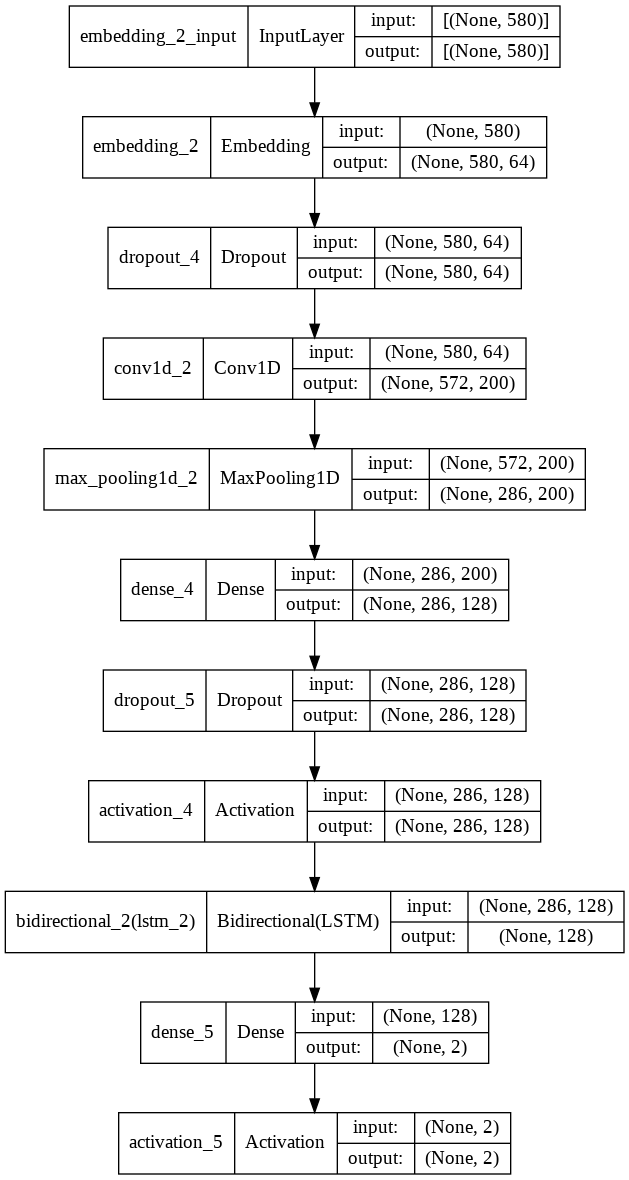

In [ ]:
from keras.utils.vis_utils import plot_model

model_sent = Sequential()
model_sent.add(Embedding(vocab_sent,
                      embedding_dims,
                      input_length=maxlen_sent))
model_sent.add(Dropout(dropout))

model_sent.add(Conv1D(filters,
                      kernel_size,
                      padding='valid',
                      activation='relu',
                      strides=1))

model_sent.add(MaxPooling1D())
model_sent.add(Dense(hidden_dims))
model_sent.add(Dropout(dropout))
model_sent.add(Activation('relu'))

model_sent.add(Bidirectional(LSTM(lstm_unit)))

model_sent.add(Dense(2))
model_sent.add(Activation('sigmoid'))

plot_model(model_sent, to_file='model_sent6.png', show_shapes=True, show_layer_names=True)
#ctk = model_sent

#model_sent.compile(loss='binary_crossentropy',
#                optimizer='adam',
#                metrics=['accuracy'])

#history_sent = model_sent.fit(x_train_sent, y_train_sent,
#          batch_size=64,
#          epochs=8,
#          validation_split = 0.33,
#          callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)])

In [ ]:
# Save the model
filepath = './saved_model'
save_model(model_sent, filepath)

# Load the model
model_sent = load_model(filepath, compile = True)

INFO:tensorflow:Assets written to: ./saved_model/assets


INFO:tensorflow:Assets written to: ./saved_model/assets


# Predict Sentiment
tidak bisa di run karena butuh negation handling, jadi langsung evaluate aja

In [ ]:
#stopword_list = ["pernah", "dan", "untuk", "yang", "dengan", "sangat", "banyak", "dari",
#            "kita", "saya", "juga", "bisa", "karena", "kalau", "tapi", "akan", "sudah", "kami", "adalah",
#            "anda", "lagi", "buat", "salah", "sampai", "dapat", "dalam", "lebih", "pada", "sekali", "atau", "masih",
#            "jika", "apa", "beberapa", "menjadi", "tetap", "saja", "terdapat", "boleh", "begitu", "hanya", "paling",
#            "sehingga", "jadi", "sambil", "harus", "memang", "setiap", "selalu", "berada", "kamu", "sebagai", "bagi",
#            "sana", "lain", "setelah", "semua", "seperti", "dulu", "dahulu", "ketika", "terlalu", "mungkin", "namun",
#            "hingga", "ada", "bila", "agak",  "tersebut", "sebuah", "selain", "sungguh", "bahkan", "tetapi", "apalagi",
#            "belum", "telah", "terus", "meskipun", "lalu", "sama", "agar", "pula", "secara", "selama", "tiap", "bagian",
#            "meski", "yaitu",  "serta", "seorang", "orang", "walaupun", "tertentu", "maka", "seolah", "cuma", "sang",
#            "alhamdulillah", "seakan", "bakal", "sekaligus", "kebanyakan", "sebelum", "senantiasa", "adanya", "saat",
#            "itulah", "tadi", "terkait", "begitulah", "kira", "ke", "di", "nya", "antara", "ialah", "ya", "aja",
#            "ini", "itu", "sih"]

In [ ]:
#def stopword(list):
#    rsl = []
#    for val in list:
#        querywords = val.split()
#        resultwords  = [word for word in querywords if word.lower() not in stopword_list]
#        result = ' '.join(resultwords)
#        rsl.append(result)
#    return rsl

In [ ]:
#def join_negation(text):
#    """  Join negation word with delimiter. """
#    text_list = text.split(' ')

#    for index in range(len(text_list)):
#        if (text_list[index] == 'tidak' or text_list[index] == 'kurang' or text_list[index] == 'jangan'
#           or text_list[index] == 'bukan'):
#            if index < len(text_list) - 1:
#                text_list[index] = text_list[index] + "_" + text_list[index + 1]
#                text_list[index + 1] = ''
#            else:
#                text_list[index] = ''
#    return ' '.join(' '.join(text_list).split())

In [ ]:
#def cleansentencesent(list):
#    rsl = []
#    tmp = stopword(list)
#    for val in tmp:
#        tmpp = join_negation(val)
#        rsl.append(tmpp)
#    return rsl

In [ ]:
#def ABSA_sent(list):
#    rsl = []
#    spl_sent = [val.split() for val in list]
#    hasil_sent = [ct.tag_sents([val]) for val in spl_sent]
#    hasil_sent = [item for sublist in hasil_sent for item in sublist]
#    for val, ko in zip(hasil_sent, list):
#        tmp = ""
#        for vall in val:
#            if(vall[1] == "NEG" or vall[1] == "JJ" or vall[1] == "VB"):
#                tmp = tmp + vall[0] + " "
#            if('_' in vall[0]):
#                tmp = tmp + vall[0] + " "
#        tmp = tmp.split()
#        tmp = ' '.join(tmp)
#        k = tk_sent.texts_to_sequences([tmp]) #represent a completely new set of word sequence
#        k = sequence.pad_sequences(k, maxlen=maxlen_sent)
#        hsl = labelencoder_Y_sent.inverse_transform([model_sent.predict_classes(k)])
#        rsl.append(hsl)
#    return rsl

In [ ]:
#kal_sent = ["Pemandangannya indah sekali, banyak berbagai macam pohon dan bunga",
#       "Tempatnya sangat teduh",
#       "sayangnya tempat ini ramai dan sesak ketika musim libur",
#       "saya tidak suka dengan keramaian",
#       "pantai fasilitasnya tidak memadai",
#       "hawanya sedikit dingin dengan udara yang segar",
#       "lokasi tidak terik",
#       "Pas banget buat kamu yang suka akan nuansa alam, apalagi untuk botram bareng keluarga besar. Tempatnya sejuk ditambah ada rusa juga"]

#print(ABSA_sent(cleansentencesent(kal_sent)))

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = maxlen_sent

tokenizer = Tokenizer(num_words=max_words)

In [ ]:
aspect = ['negative','positive']
sentence = ['building another remnant british colonial period located opposite railway station easy enough find also nice view national mosque didnt going inside office building days']
sequence2 = tokenizer.texts_to_sequences(sentence)
test = pad_sequences(sequence2, maxlen=max_len)
aspect[np.around(model_sent.predict(test), decimals=0).argmax(axis=1)[0]]

'positive'

In [ ]:
def ABSA_sent(list):
    rsl = []
    aspect = ['negative','positive']
    hasil_aspect = list;
    for val in hasil_aspect:
      sequence2 = tk_sent.texts_to_sequences([val])
      test = sequence.pad_sequences(sequence2, maxlen=maxlen_sent)
      #hsl = labelencoder_Y_aspect.inverse_transform([model_aspect.predict(test)])
      hsl = aspect[np.around(model_sent.predict(test), decimals=0).argmax(axis=1)[0]]
      rsl.append(hsl)
    return rsl

In [ ]:
kal_sent = ["want food plane come next flight information given arrival everything toilet shower area confusing staff disinterested almost rude last visit",
            "building another remnant british colonial period located opposite railway station easy enough find also nice view national mosque didnt going inside office building days"]

print(ABSA_sent(kal_sent))

['negative', 'positive']


# Evaluate Sentiment

In [ ]:
predict_x=model_sent.predict(x_test_sent)
new_review_category_sent=np.argmax(predict_x,axis=1)

In [ ]:
#new_review_category_sent = model_sent.predict_classes(x_test_sent)

In [ ]:
decode_sent = np.argmax(y_test_sent, axis=1)

In [ ]:
lab_sent = ["negative","positive"]

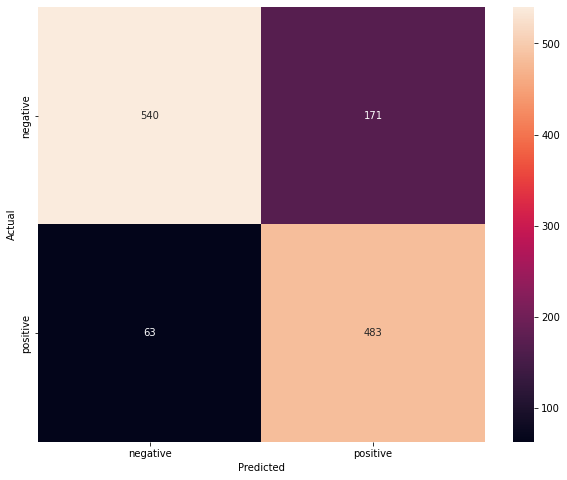

In [ ]:
conf_matrix(new_review_category_sent, decode_sent, lab_sent)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(new_review_category_sent, decode_sent)

0.8138424821002387

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(new_review_category_sent, decode_sent))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       711
           1       0.74      0.88      0.80       546

    accuracy                           0.81      1257
   macro avg       0.82      0.82      0.81      1257
weighted avg       0.83      0.81      0.81      1257



In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(new_review_category_sent, decode_sent))
print('F1 score:', f1_score(new_review_category_sent, decode_sent, average='macro'))
print('Recall:', recall_score(new_review_category_sent, decode_sent, average='macro'))
print('Precision:', precision_score(new_review_category_sent, decode_sent, average='macro'))

Accuracy: 0.8138424821002387
F1 score: 0.813458904109589
Recall: 0.8220545277507303
Precision: 0.8170272490757223


In [ ]:
accr_sent = model_sent.evaluate(x_test_sent,y_test_sent)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_sent[0],accr_sent[1]))

40/40 [==============================] - 7s 153ms/step - loss: 0.5766 - accuracy: 0.8138
Test set
  Loss: 0.577
  Accuracy: 0.814


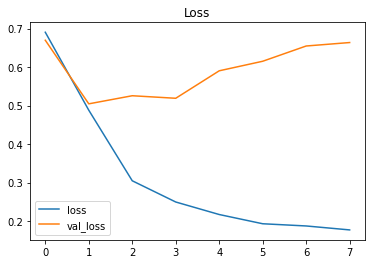

In [ ]:
plt.title('Loss')
plt.plot(history_sent.history['loss'], label='loss')
plt.plot(history_sent.history['val_loss'], label='val_loss')
plt.legend()
plt.show();

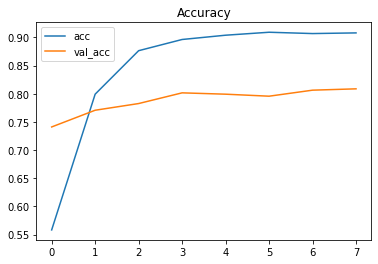

In [ ]:
plt.title('Accuracy')
plt.plot(history_sent.history['accuracy'], label='acc')
plt.plot(history_sent.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show();

# Aspect Based Sentiment Analysis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ABSA = ["want food plane come next flight information given arrival everything toilet shower area confusing staff disinterested almost rude last visit",
        "building another remnant british colonial period located opposite railway station easy enough find also nice view national mosque didnt going inside office building days"]

sn = ABSA_sent(ABSA)
ap = ABSA_aspect(ABSA)
for val, sen, asp in zip(ABSA, sn, ap):
    print(val)
    print("Sentiment : " + sen)
    print("Aspect: " + asp)
    print()

want food plane come next flight information given arrival everything toilet shower area confusing staff disinterested almost rude last visit
Sentiment : negative
Aspect: halal food

building another remnant british colonial period located opposite railway station easy enough find also nice view national mosque didnt going inside office building days
Sentiment : positive
Aspect: toilet

